In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Importing Data

In [2]:
#Defining Path

In [3]:
path = path = r'/Users/alliequalman/Documents/Instacart Basket Analysis /Scripts/Scripts'

In [4]:
ords_prods_cust_merge = pd.read_pickle(os.path.join(path, r'/Users/alliequalman/Documents/Instacart Basket Analysis /Scripts/Scripts/4.9_part_2.pkl'))

In [5]:
# Check shape of imported dataframe
ords_prods_cust_merge.shape

(30629741, 31)

In [6]:
#checking for security implications

In [7]:
# Check the output for PII
ords_prods_cust_merge.head()

,order_id,user_id,eval_set,order_number,order_days_of_week,hour_order_placed,days_since_prior_order,product_id,add_to_cart_order,reordered,...,loyalty_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,marital_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,New customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,New customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,New customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,New customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,New customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [8]:
#The 'first_name' and 'last_name' columns both contain personally identifiable information, and so need to be excluded from the analysis.

In [9]:
# Drop columns containing PII data
df_instacart = ords_prods_cust_merge.drop(columns = ['first_name', 'last_name'])

In [10]:
# View new dataframe
df_instacart.head()

,order_id,user_id,eval_set,order_number,order_days_of_week,hour_order_placed,days_since_prior_order,product_id,add_to_cart_order,reordered,...,busiest_period_of_day,max_order,loyalty_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Average orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Average orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Most orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Average orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Most orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423


In [11]:
# Creating order frequency flag

In [12]:
#finding median with transform
df_instacart['median_prior_days'] = df_instacart.groupby(['user_id'])['days_since_prior_order'].transform(np.median)

In [13]:
df_instacart[['user_id','median_prior_days']].head(30)

,user_id,median_prior_days
0,1,20.5
1,1,20.5
2,1,20.5
3,1,20.5
4,1,20.5
5,1,20.5
6,1,20.5
7,1,20.5
8,1,20.5
9,1,20.5


In [14]:
#creating flag
df_instacart.loc[df_instacart['median_prior_days'] > 20, 'order_frequency'] = 'Non-frequent customer'

In [15]:
df_instacart.loc[(df_instacart['median_prior_days'] <= 20) & 
                     (df_instacart['median_prior_days'] > 10), 'order_frequency'] = 'Regular customer'

In [16]:
df_instacart.loc[df_instacart['median_prior_days'] <= 10, 'order_frequency'] = 'Frequent customer'

In [17]:
df_instacart[['user_id','median_prior_days','order_frequency']].head(10)

,user_id,median_prior_days,order_frequency
0,1,20.5,Non-frequent customer
1,1,20.5,Non-frequent customer
2,1,20.5,Non-frequent customer
3,1,20.5,Non-frequent customer
4,1,20.5,Non-frequent customer
5,1,20.5,Non-frequent customer
6,1,20.5,Non-frequent customer
7,1,20.5,Non-frequent customer
8,1,20.5,Non-frequent customer
9,1,20.5,Non-frequent customer


In [18]:
#creating variable for number of orders made by user, each order is represented by entry with user_id in table
#count of user_id would be number of orders
df_instacart['total_orders']=df_instacart.groupby(['user_id']).user_id.transform('count')

In [19]:
#value_counts
df_instacart['order_frequency'].value_counts(dropna=False)

Frequent customer        20362706
Regular customer          6824080
Non-frequent customer     3442950
NaN                             5
Name: order_frequency, dtype: int64

In [20]:
df_instacart['order_frequency'].value_counts(dropna=False).to_clipboard()

In [21]:
#activity of customers

In [22]:
#low activity customers have less than 5 orders
#creating exclusion flag by counting the amount of times user_id shows up in dataframe, less than 5 is low activity
results_2=[]
for total in df_instacart['total_orders']:
    if total < 5:
        results_2.append('Low Activity')
    else:
        results_2.append('Regular Activity')

In [23]:
#including column in dataframe
df_instacart['activity_flag']=results_2

In [24]:
#there are 8660 low activity customers
df_instacart['activity_flag'].value_counts(dropna=False)

Regular Activity    30627022
Low Activity            2719
Name: activity_flag, dtype: int64

In [25]:
#creating subset of low activity customers
low_activity_customers= df_instacart[df_instacart['activity_flag']=='Low Activity']

In [26]:
#exporting low activity subset
low_activity_customers.to_csv(os.path.join(path, r'/Users/alliequalman/Documents/Instacart Basket Analysis /Scripts/Scripts/low_activity_export_from_4.10.csv'))

In [27]:
#excluding sample from dataset
df_instacart.drop(df_instacart[df_instacart['activity_flag']=='Low Activity'].index, inplace=True)

In [28]:
df_instacart['activity_flag'].value_counts()

Regular Activity    30627022
Name: activity_flag, dtype: int64

In [29]:
 #viewing dataset
pd.set_option('display.max_columns', None)
df_instacart.head(20)

,order_id,user_id,eval_set,order_number,order_days_of_week,hour_order_placed,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income,median_prior_days,order_frequency,total_orders,activity_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423,20.5,Non-frequent customer,59,Regular Activity
1,2398795,1,prior,2,3,7,15.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423,20.5,Non-frequent customer,59,Regular Activity
2,473747,1,prior,3,3,12,21.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423,20.5,Non-frequent customer,59,Regular Activity
3,2254736,1,prior,4,4,7,29.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423,20.5,Non-frequent customer,59,Regular Activity
4,431534,1,prior,5,4,15,28.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423,20.5,Non-frequent customer,59,Regular Activity
5,3367565,1,prior,6,2,7,19.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423,20.5,Non-frequent customer,59,Regular Activity
6,550135,1,prior,7,1,9,20.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423,20.5,Non-frequent customer,59,Regular Activity
7,3108588,1,prior,8,1,14,14.0,196,2,1,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423,20.5,Non-frequent customer,59,Regular Activity
8,2295261,1,prior,9,1,16,0.0,196,4,1,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423,20.5,Non-frequent customer,59,Regular Activity
9,2550362,1,prior,10,4,8,30.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423,20.5,Non-frequent customer,59,Regular Activity


In [30]:
#Create Region Column

In [31]:
# View state counts in dataframe
df_instacart['state'].value_counts(dropna = False)

California              630286
Pennsylvania            629780
Rhode Island            621296
Georgia                 620569
Arizona                 619758
North Carolina          618221
Oklahoma                615314
Minnesota               613646
New Mexico              611442
Maine                   610258
Alaska                  610233
Wyoming                 609721
Massachusetts           608945
Arkansas                607960
Mississippi             607291
Texas                   605535
North Dakota            605291
Nevada                  605018
Missouri                604340
Virginia                603500
South Dakota            602696
Kansas                  602355
Louisiana               602319
Alabama                 602260
South Carolina          602008
New York                601373
Washington              601281
Montana                 600552
Michigan                600540
Kentucky                600269
Colorado                599715
Oregon                  599294
Delaware

In [32]:
#Listing states by region: Northeast
Northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania'
        ,'New Jersey']

In [33]:
#Listing states by region: Midwest
Midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas'
         ,'Minnesota','Iowa','Missouri']

In [34]:
#Listing states by region: South
South=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina'
       ,'Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [35]:
#Listing states by region: West
West=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon',
      'California','Hawaii']

In [36]:
#loop for region column
result=[]
for state in df_instacart['state']:
    if state in Northeast:
        result.append('Northeast')
    elif state in Midwest:
        result.append('Midwest')
    elif state in South:
        result.append('South')
    else:
        result.append('West')

In [37]:
# Add region column to dataframe
df_instacart['region'] = result

In [38]:
df_instacart['region'].value_counts()

South        10197943
West          7831118
Midwest       7176384
Northeast     5421577
Name: region, dtype: int64

In [39]:
#US Regions Spending Habits

In [40]:
#aggregating for regional expenditure
df_instacart.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices           
               mean  min   max
region                        
Midwest    7.794021  1.0  25.0
Northeast  7.782821  1.0  25.0
South      7.796321  1.0  25.0
West       7.790732  1.0  25.0

In [41]:
#aggregating for order frequency
df_instacart.groupby('region').agg({'median_prior_days': ['mean', 'min', 'max']})

median_prior_days           
                       mean  min   max
region                                
Midwest           10.462685  0.0  30.0
Northeast         10.373097  0.0  30.0
South             10.404928  0.0  30.0
West              10.371300  0.0  30.0

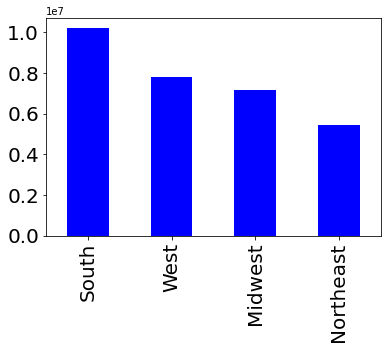

In [42]:
#regional distribution of customers
regional_bar=df_instacart['region'].value_counts().plot.bar(color='blue', fontsize=20)

In [43]:
regional_bar.figure.savefig(os.path.join(path, r'/Users/alliequalman/Documents/Instacart Basket Analysis /Scripts/Visuals/regional_bar_chart.png'))

In [44]:
#South has the most customers, meanwhile the northeast has the least

In [45]:
#100% stacked bar chart for order frequency in each region

#creating crosstab for region and frequency

region_frequency = pd.crosstab(index=df_instacart['region'], columns=df_instacart['order_frequency'], normalize="index")

#creating cross tab to display labels

region_frequency_labels = pd.crosstab(index=df_instacart['region'],columns=df_instacart['order_frequency'])

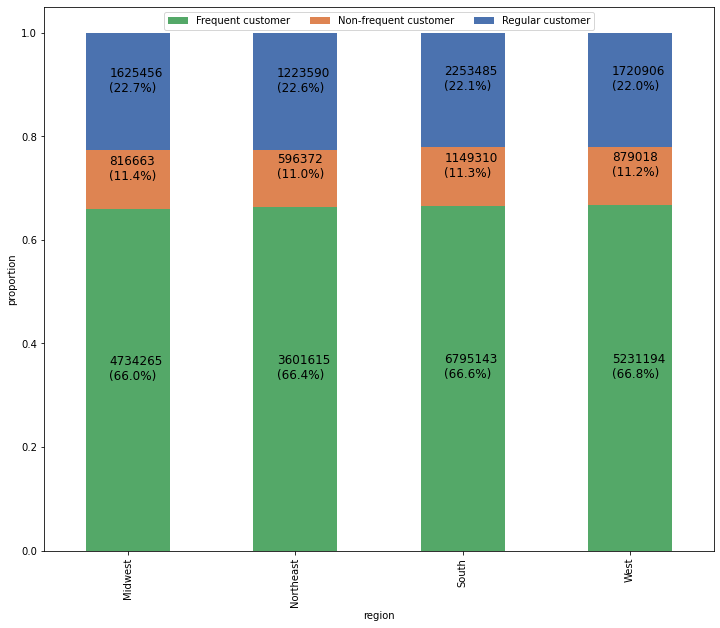

In [46]:
#plotting chart
region_frequency_dist=region_frequency.plot(kind='bar', 
                        stacked=True, 
                        color=['#54a868','#de8452','#4b72af'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=3)
plt.ylabel("proportion")
plt.xlabel("region")


for n, y in enumerate([*region_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(region_frequency.loc[y],
                                         region_frequency_labels.loc[y],
                                          region_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [47]:
#6 Observing ordering habits across the different customer loyalties

In [48]:
region_frequency_dist.figure.savefig(os.path.join(path, r'/Users/alliequalman/Documents/Instacart Basket Analysis /Scripts/Visuals/regional_freq_distribution_chart.png'))

In [49]:
#aggregating for loyalty expenditure
df_instacart.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                      mean  min   max
loyalty_flag                         
Loyal customer    7.775282  1.0  25.0
New customer      7.802109  1.0  25.0
Regular customer  7.798760  1.0  25.0

In [50]:
#aggregating for loyalty order frequency
df_instacart.groupby('loyalty_flag').agg({'median_prior_days': ['mean', 'min', 'max']})

median_prior_days           
                              mean  min   max
loyalty_flag                                 
Loyal customer            5.175954  0.0  14.0
New customer             18.465923  0.0  30.0
Regular customer         10.616838  0.0  30.0

In [51]:
#7 Visualizations for customer loyalty observations

In [52]:
#distribution of customer loyalty
#creating subset with userid and loyalty columns
user_loyalty=df_instacart[['user_id','loyalty_flag']]
#removing duplicate values
user_loyalty_unique=user_loyalty.drop_duplicates()

In [53]:
user_loyalty_unique['loyalty_flag'].value_counts()

New customer        105403
Regular customer     72734
Loyal customer       16060
Name: loyalty_flag, dtype: int64

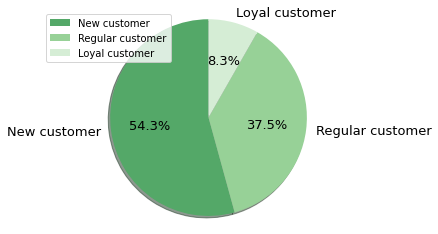

In [54]:
##pie chart for loyalty flag
labels = 'New customer', 'Regular customer', 'Loyal customer'
sizes = user_loyalty_unique['loyalty_flag'].value_counts()
colors = ['#54a868','#97d197','#d5edd5']
textprops = {"fontsize":13}

loyal, ax = plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90,textprops=textprops)
ax.axis('equal')  

plt.legend()
plt.show()



In [61]:
loyal.figure.savefig(os.path.join(path, r'/Users/alliequalman/Documents/Instacart Basket Analysis /Scripts/Visuals/user_loyalty_unique_pie_chart.png'))

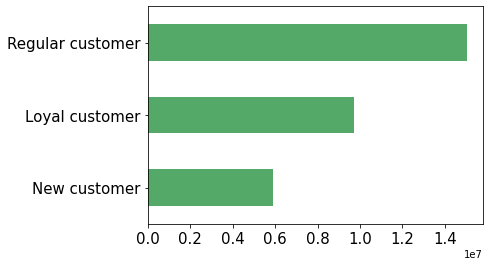

In [56]:
# frequency of orders from different customer loyalities
loyalty_bar=df_instacart['loyalty_flag'].value_counts().sort_values().plot.barh(color='#54a868',fontsize=15)

In [57]:
loyalty_bar.figure.savefig(os.path.join(path, r'/Users/alliequalman/Documents/Instacart Basket Analysis /Scripts/Visuals/;oyalty_bar_chart.png'))

In [58]:
#100% stacked bar chart for order frequency for each loyalty status

#creating crosstab for loyalty flag and frequency

loyalty_frequency = pd.crosstab(index=df_instacart['loyalty_flag'], columns=df_instacart['order_frequency'], normalize="index")

#creating cross tab to display labels

loyalty_frequency_labels = pd.crosstab(index=df_instacart['loyalty_flag'],columns=df_instacart['order_frequency'])

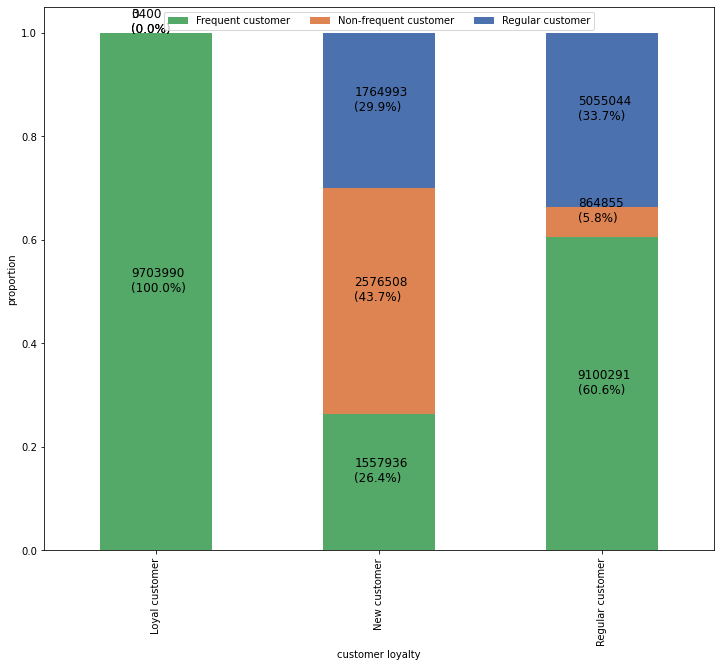

In [59]:
#plotting chart
loyalty_frequency_dist=loyalty_frequency.plot(kind='bar', 
                        stacked=True, 
                        color=['#54a868','#de8452','#4b72af'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=3)
plt.ylabel("proportion")
plt.xlabel("customer loyalty")


for n, y in enumerate([*loyalty_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(loyalty_frequency.loc[y],
                                         loyalty_frequency_labels.loc[y],
                                          loyalty_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [62]:
loyalty_frequency_dist.figure.savefig(os.path.join(path, r'/Users/alliequalman/Documents/Instacart Basket Analysis /Scripts/Visuals/loyalty_freq_dist_bar_chart.png'))

In [63]:
#8 Creating customer profiles

In [64]:
#Age group flag

In [65]:
#creating age group flag
#young adults range from 18-24
df_instacart.loc[df_instacart['age'] <= 24, 'age_group'] = 'Young adult'
#adults range from 25-64
#adult flag
df_instacart.loc[(df_instacart['age'] > 24) & (df_instacart['age'] <=64), 'age_group'] = 'Adult' 
#seniors range from 65 and over
#senior flag
df_instacart.loc[df_instacart['age'] >=65, 'age_group'] = 'Senior'

In [66]:
df_instacart['age_group'].value_counts()

Adult          19148618
Senior          8096854
Young adult     3381550
Name: age_group, dtype: int64

In [67]:
#Age group aggregation

In [68]:
#aggregating for age group expenditure
df_instacart.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
Adult        7.789411  1.0  25.0
Senior       7.797231  1.0  25.0
Young adult  7.793802  1.0  25.0

In [69]:
#aggregating for age group order frequency
df_instacart.groupby('age_group').agg({'median_prior_days': ['mean', 'min', 'max']})

median_prior_days           
                         mean  min   max
age_group                               
Adult               10.428577  0.0  30.0
Senior              10.361777  0.0  30.0
Young adult         10.367992  0.0  30.0

In [70]:
#creating income flag: Low income, middle income and upper income

In [71]:
#Low income ranges from 0-52,000
#low income flag
df_instacart.loc[df_instacart['income'] <= 52000, 'income_flag'] = 'Low income'

#Middle income ranges from 52,000-156,000
#middle income flag
df_instacart.loc[(df_instacart['income'] > 52000) & (df_instacart['income'] <=156000), 'income_flag'] = 'Middle income' 

# Upper income ranges from 156,000 and higher
#upper income flag
df_instacart.loc[df_instacart['income'] > 156000, 'income_flag'] = 'Upper income'
#these values are the official ranges for the US in 2017

In [72]:
df_instacart['income_flag'].value_counts()

Middle income    24196518
Low income        3652177
Upper income      2778327
Name: income_flag, dtype: int64

In [73]:
#aggregating for income bracket expenditure
df_instacart.groupby('income_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                   mean  min   max
income_flag                       
Low income     6.744449  1.0  25.0
Middle income  7.932715  1.0  25.0
Upper income   7.943389  1.0  25.0

In [74]:
#aggregating for income bracket order frequency
df_instacart.groupby('income_flag').agg({'median_prior_days': ['mean', 'min', 'max']})

median_prior_days           
                           mean  min   max
income_flag                               
Low income            11.108726  0.0  30.0
Middle income         10.325566  0.0  30.0
Upper income          10.163219  0.0  30.0

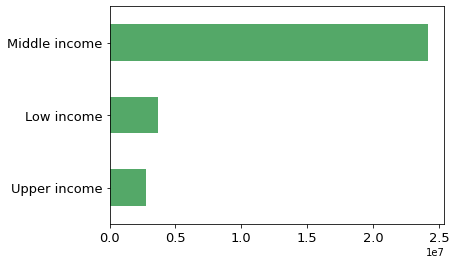

In [75]:
#bar chart for orders made by each income group
income_bar=df_instacart['income_flag'].value_counts().sort_values().plot.barh(color='#54a868', fontsize=13)

In [76]:
income_bar.figure.savefig(os.path.join(path, r'/Users/alliequalman/Documents/Instacart Basket Analysis /Scripts/Visuals/income_bar_chart.png'))

In [77]:
#marital Status

In [78]:
df_instacart['marital_status'].value_counts()

married                             21507344
single                               5019246
divorced/widowed                     2629727
living with parents and siblings     1470705
Name: marital_status, dtype: int64

In [79]:
#aggregating for marital status expenditure
df_instacart.groupby('marital_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                                      mean  min   max
marital_status                                       
divorced/widowed                  7.801104  1.0  25.0
living with parents and siblings  7.806856  1.0  25.0
married                           7.791789  1.0  25.0
single                            7.783557  1.0  25.0

In [80]:
#aggregating for marital status order frequency
df_instacart.groupby('marital_status').agg({'median_prior_days': ['mean', 'min', 'max']})

median_prior_days           
                                              mean  min   max
marital_status                                               
divorced/widowed                         10.288075  0.0  30.0
living with parents and siblings         10.320052  0.0  30.0
married                                  10.421420  0.0  30.0
single                                   10.416082  0.0  30.0

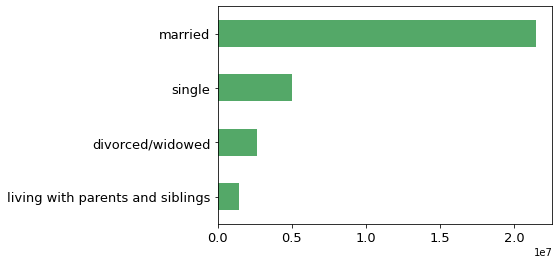

In [81]:
#bar chart showing the orders made by customers of each family status
marital_bar=df_instacart['marital_status'].value_counts().sort_values().plot.barh(color='#54a868', fontsize=13)

In [82]:
#dependent flag

In [83]:
#customers with 0 dependents are no dependents customers
df_instacart.loc[df_instacart['number_of_dependents']== 0, 'dependent_flag'] = 'No dependents'

#customers with more than 0 dependents are parents
df_instacart.loc[df_instacart['number_of_dependents'] > 0, 'dependent_flag'] = 'Parent'

In [84]:
df_instacart['dependent_flag'].value_counts()

Parent           22978049
No dependents     7648973
Name: dependent_flag, dtype: int64

In [85]:
#aggregating for dependent expenditure
df_instacart.groupby('dependent_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
dependent_flag                     
No dependents   7.789590  1.0  25.0
Parent          7.792753  1.0  25.0

In [86]:
#aggregating for dependent order frequency
df_instacart.groupby('dependent_flag').agg({'median_prior_days': ['mean', 'min', 'max']})

median_prior_days           
                            mean  min   max
dependent_flag                             
No dependents          10.372073  0.0  30.0
Parent                 10.414932  0.0  30.0

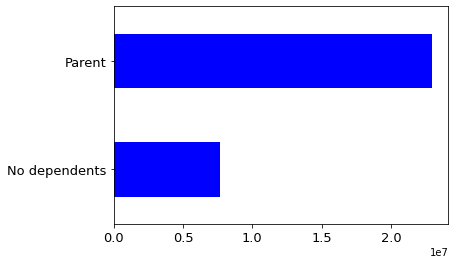

In [87]:
#bar chart showing the amount of orders made by customers in each dependent flag
dependent_bar=df_instacart['dependent_flag'].value_counts().sort_values().plot.barh(color='Blue', fontsize=13)

In [96]:
dependent_bar.figure.savefig(os.path.join(path, r'/Users/alliequalman/Documents/Instacart Basket Analysis /Scripts/Visuals/parent_vs_no_dependents.png'))

In [88]:
#Department flags and importing department data

In [89]:
#importing departments dataset
departments=pd.read_csv(os.path.join(path, r'/Users/alliequalman/Downloads/departments.csv'),index_col=False)

In [90]:
departments.head()

,department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,bulk,personal care,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [91]:
#transposing deparments
departments.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [92]:
df_dep_t = departments.T

In [93]:
df_dep_t.reset_index()

,index,0
0,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta


In [94]:
new_header = df_dep_t.iloc[0]

In [95]:
df_dep_t_new = df_dep_t[1:]

In [97]:
df_dep_t_new

,0
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [98]:
df_dep_t_new.columns = new_header

In [99]:
df_dep_t_new

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [100]:
df_dep_t_new.to_csv(os.path.join(path, r'/Users/alliequalman/Documents/Instacart Basket Analysis /Scripts/Scripts/departments_wrangled.csv'))

In [101]:
data_dict = df_dep_t_new.to_dict('index')

In [102]:
data_dict

{'1': {'department': 'frozen'},
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}

In [103]:
#importing departments dataset
departments=pd.read_csv(os.path.join(path, r'/Users/alliequalman/Documents/Instacart Basket Analysis /Scripts/Scripts/departments_wrangled.csv'),index_col=False)

In [104]:
#creating data dictionary for department id
zipped=zip(departments['Unnamed: 0'], departments['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [105]:
# mapping  department names to department id in dataframe
df_instacart['department'] = df_instacart['department_id'].map(data_dict)
df_instacart.head()

,order_id,user_id,eval_set,order_number,order_days_of_week,hour_order_placed,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income,median_prior_days,order_frequency,total_orders,activity_flag,region,age_group,income_flag,dependent_flag,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423,20.5,Non-frequent customer,59,Regular Activity,South,Adult,Low income,Parent,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423,20.5,Non-frequent customer,59,Regular Activity,South,Adult,Low income,Parent,beverages
2,473747,1,prior,3,3,12,21.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423,20.5,Non-frequent customer,59,Regular Activity,South,Adult,Low income,Parent,beverages
3,2254736,1,prior,4,4,7,29.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423,20.5,Non-frequent customer,59,Regular Activity,South,Adult,Low income,Parent,beverages
4,431534,1,prior,5,4,15,28.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423,20.5,Non-frequent customer,59,Regular Activity,South,Adult,Low income,Parent,beverages


In [110]:
#visualizations for customer profiles

In [111]:
#age groups

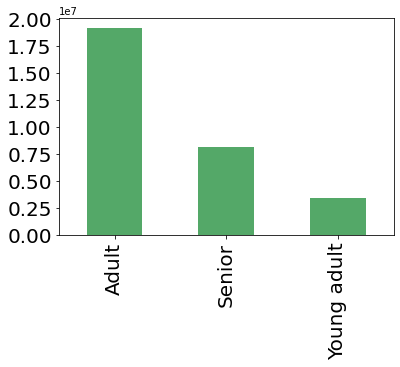

In [112]:
#creating bar chart for orders made by each age group
age_bar=df_instacart['age_group'].value_counts().plot.bar(color='#54a868',fontsize=20)

In [125]:
age_bar.figure.savefig(os.path.join(path, r'/Users/alliequalman/Documents/Instacart Basket Analysis /Scripts/Visuals/age_bar.png'))

In [113]:
# 100% stacked bar chart for regional age distribution 
#creating crosstab for region and age group

age_region = pd.crosstab(index=df_instacart['region'], columns=df_instacart['age_group'], normalize="index")

#creating cross tab to display labels

age_region_labels = pd.crosstab(index=df_instacart['region'],columns=df_instacart['age_group'])

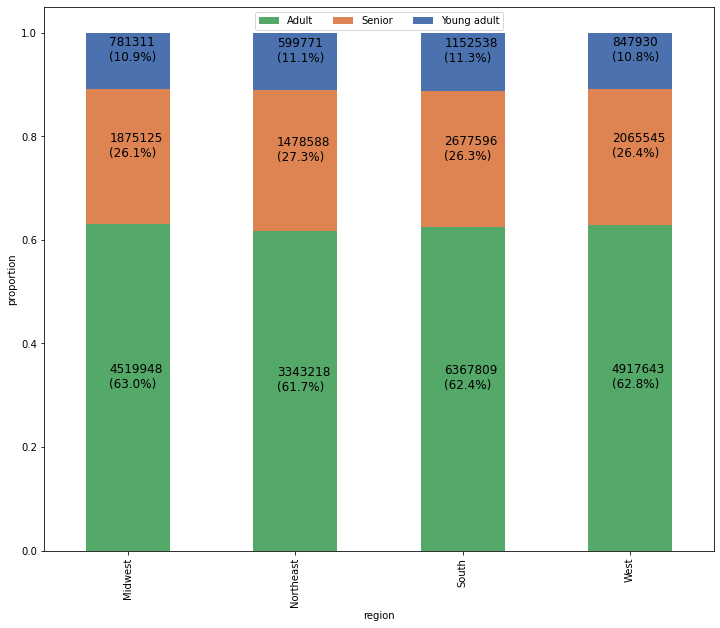

In [114]:
#plotting chart
age_regional_dist=age_region.plot(kind='bar', 
                        stacked=True, 
                        color=['#54a868','#de8452','#4b72af'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("region")


for n, y in enumerate([*age_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(age_region.loc[y],
                                         age_region_labels.loc[y],
                                          age_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [126]:
age_regional_dist.figure.savefig(os.path.join(path, r'/Users/alliequalman/Documents/Instacart Basket Analysis /Scripts/Visuals/age_regional_dist.png'))

In [115]:
# 100% stacked bar chart for age and order frequency distribution 
#creating crosstab for region and age group

age_frequency = pd.crosstab(index=df_instacart['age_group'], columns=df_instacart['order_frequency'], normalize="index")

#creating cross tab to display labels

age_frequency_labels = pd.crosstab(index=df_instacart['age_group'],columns=df_instacart['order_frequency'])

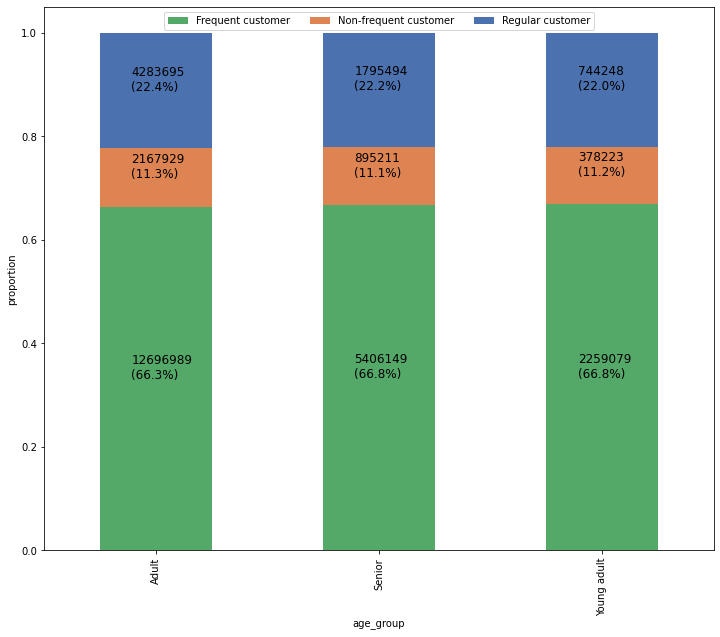

In [116]:
#plotting chart
age_frequency_dist=age_frequency.plot(kind='bar', 
                        stacked=True, 
                        color=['#54a868','#de8452','#4b72af'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=3)
plt.ylabel("proportion")
plt.xlabel("age_group")


for n, y in enumerate([*age_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(age_frequency.loc[y],
                                         age_frequency_labels.loc[y],
                                          age_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [127]:
age_frequency_dist.figure.savefig(os.path.join(path, r'/Users/alliequalman/Documents/Instacart Basket Analysis /Scripts/Visuals/age_freq_dist.png'))

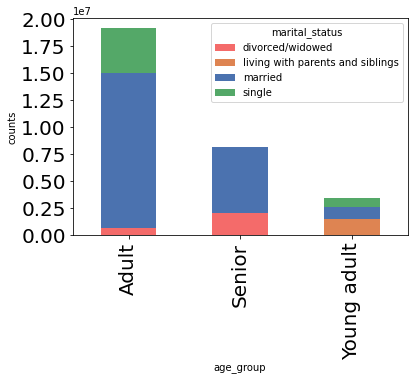

In [117]:
#stacked bar chart for ahe group and marital status
age_marital_bar=df_instacart.groupby('age_group')['marital_status'].value_counts().sort_values(ascending=False).unstack().plot.bar(
    stacked=True,ylabel='counts',color=['#F46B6A','#de8452','#4b72af','#54a868'], fontsize=20)

In [128]:
age_marital_bar.figure.savefig(os.path.join(path, r'/Users/alliequalman/Documents/Instacart Basket Analysis /Scripts/Visuals/age_marital_bar.png'))

In [118]:
# 100% stacked bar chart for regional income distribution 
#creating crosstab for region and income flag

income_region = pd.crosstab(index=df_instacart['region'], columns=df_instacart['income_flag'], normalize="index")

#creating cross tab to display labels

income_region_labels = pd.crosstab(index=df_instacart['region'],columns=df_instacart['income_flag'])

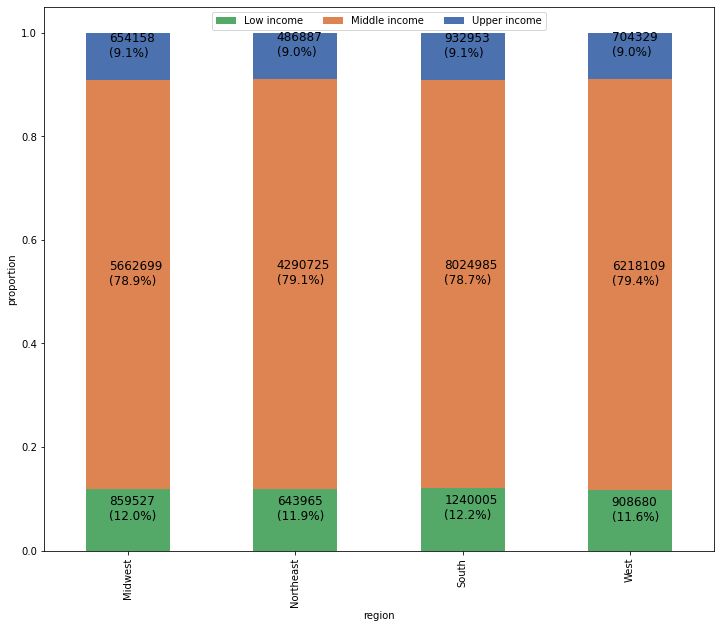

In [119]:
#plotting chart
income_regional_dist=income_region.plot(kind='bar', 
                        stacked=True, 
                        color=['#54a868','#de8452','#4b72af'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("region")


for n, y in enumerate([*income_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(income_region.loc[y],
                                         income_region_labels.loc[y],
                                          income_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [129]:
income_regional_dist.figure.savefig(os.path.join(path, r'/Users/alliequalman/Documents/Instacart Basket Analysis /Scripts/Visuals/income_regional_dist.png'))

In [120]:
# 100% stacked bar chart for income order frequency distribution 
#creating crosstab for order frequency and income

income_frequency = pd.crosstab(index=df_instacart['income_flag'], columns=df_instacart['order_frequency'], normalize="index")

#creating cross tab to display labels

income_frequency_labels = pd.crosstab(index=df_instacart['income_flag'],columns=df_instacart['order_frequency'])

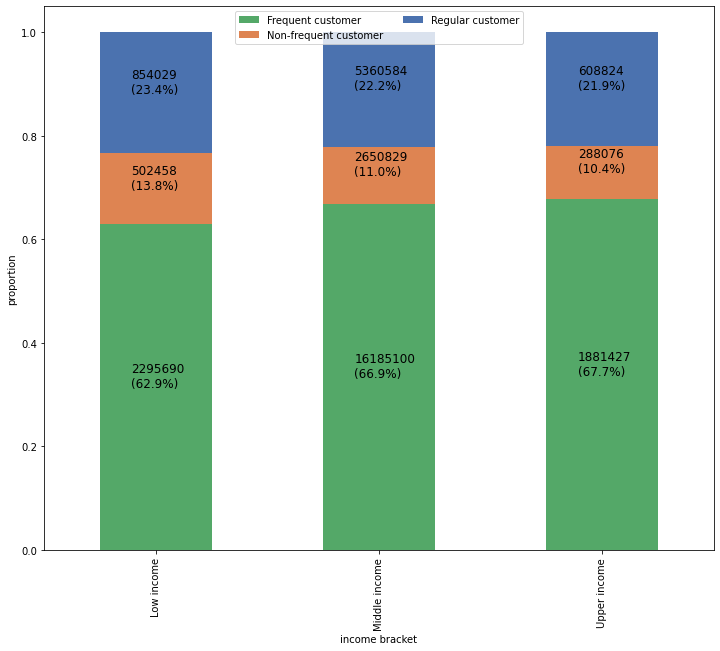

In [121]:
#plotting chart
income_frequency_dist=income_frequency.plot(kind='bar', 
                        stacked=True, 
                        color=['#54a868','#de8452','#4b72af'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=2)
plt.ylabel("proportion")
plt.xlabel("income bracket")


for n, y in enumerate([*income_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(income_frequency.loc[y],
                                         income_frequency_labels.loc[y],
                                          income_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [130]:
income_frequency_dist.figure.savefig(os.path.join(path, r'/Users/alliequalman/Documents/Instacart Basket Analysis /Scripts/Visuals/income_freq_dist.png'))

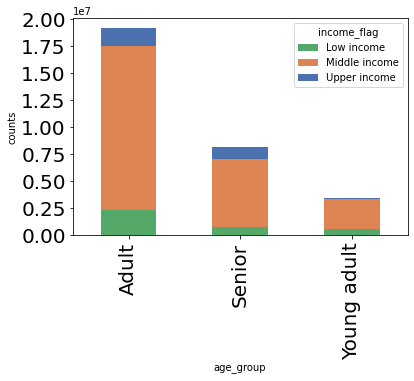

In [122]:
#stacked bar chart for age groups and income groups
age_income_bar=df_instacart.groupby('age_group')['income_flag'].value_counts().unstack().plot.bar(stacked=True,
                                                    ylabel='counts',color=['#54a868','#de8452','#4b72af'], fontsize=20)

In [131]:
age_income_bar.figure.savefig(os.path.join(path, r'/Users/alliequalman/Documents/Instacart Basket Analysis /Scripts/Visuals/age_income_bar.png'))

In [123]:
#price range value counts
df_instacart['price_range_loc'].value_counts()

Mid-range product     20662363
Low-range product      9569221
High-range product      395438
Name: price_range_loc, dtype: int64

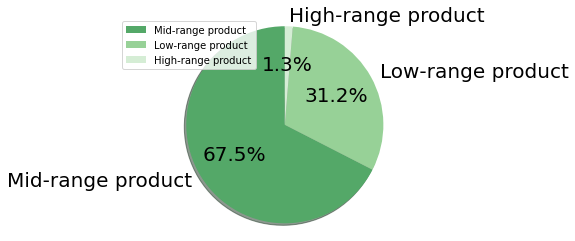

In [132]:
#pie chart for price range distribution
labels = 'Mid-range product', 'Low-range product', 'High-range product'
sizes = df_instacart['price_range_loc'].value_counts()
colors = ['#54a868','#97d197','#d5edd5']
textprops = {"fontsize":20}

fig, ax = plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90,textprops=textprops)
ax.axis('equal')  

plt.legend()
plt.show()



In [133]:
fig.figure.savefig(os.path.join(path, r'/Users/alliequalman/Documents/Instacart Basket Analysis /Scripts/Visuals/product_consumption_pie_chart.png'))

In [134]:
df_instacart.to_pickle(os.path.join(path, r'/Users/alliequalman/Documents/Instacart Basket Analysis /Scripts/Scripts/4.10_final_project.pkl'))